Hola **Edgar**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
--
</div>

# SPRINT 9 - PROYECTO

## Optimización de gastos de marketing de empresa Showz

Se dispone de los siguientes conjuntos de datos para el análisis solicitado:

- Dataframe **visits:** Registros del servidor con datos sobre las visitas desde enero 2017 a diciembre 2018
- Dataframe **orders:** Pedidos desde enero de 2017 a diciembre 2018
- Dataframe **costs:** Estadísticas de gastos de marketing

#### Paso 1. Carga, visualización y conversión de datos e importación de librerías

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
# Convertimos los datos al formato adecuado y llamamos a info() para comprobar los cambios.
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format = '%Y-%m-%d')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format = '%Y-%m-%d')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
# Convertimos los datos al formato adecuado y llamamos a info() para comprobar los cambios.
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format = '%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [8]:
# Convertimos los datos al formato adecuado y llamamos a info() para comprobar los cambios.
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el análisis inicial de tus dataset, siempre es importante primero revisar la calidad de los datos y el tipo de los mismos antes de pasar a cualquier análisis
</div>

#### Paso 2. Realización de informes y cálculo de métricas 

Visitas (visits):
- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
- ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios regresan?

In [9]:
# ¿Cuántas personas lo usan cada día, semana y mes?
visits['session_year']  = visits['Start Ts'].dt.isocalendar().year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week']  = visits['Start Ts'].dt.isocalendar().week
visits['session_date'] = visits['Start Ts'].dt.date

dau = visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau = visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
mau = (visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean())
print(dau)
print(wau)
print(mau)

Uid    907.991758
dtype: float64
Uid    5716.245283
dtype: float64
Uid    23228.416667
dtype: float64


**¿Cuántas personas utilizan Showz cada día, semana y mes?**
- Diariamente, la utilizan 908 personas en promedio.
- Mensualmente, la utlilizan 5717 personas en promedio.
- Anualmente, la utilizan 23229 personas en promedio.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cálculo! Obtener promedios está excelente, pero si la tabla tiene muchos datos y estos datos están ligados a fechas también se puede utilizar gráficas de líneas para poder explicar mejor los resultados y utilizar todos ellos
</div>

In [10]:
# ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)
sessions_per_day = visits.groupby('session_date').agg(sessions=('Uid', 'count'))
print(sessions_per_day['sessions'].mean())

987.3626373626373


**¿Cuántas sesiones hay por día?**

En promedio hay 988 sesiones por día.

In [11]:
# ¿Cuál es la duración de cada sesión?
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
print(visits['session_duration_sec'].mean())

643.506488592098


**¿Cuál es la duración de cada sesión?**

La duracion priomedio de cada sesión es de 644 segundos.

In [12]:
# ¿Con qué frecuencia los usuarios regresan?
client_return_freq = visits.sort_values(by=['Uid', 'Start Ts'])

# Cálculo de la diferencia entre la fecha de inicio de la visita actual y la anterior
client_return_freq['time_diff_between_session'] = client_return_freq.groupby('Uid')['Start Ts'].diff()
client_return_freq['time_diff_between_session'] = client_return_freq['time_diff_between_session'].dt.total_seconds() / (24 * 60 * 60)

avg_client_return_freq = client_return_freq['time_diff_between_session'].mean()

print(avg_client_return_freq)

28.11019375609083


**¿Con qué frecuencia los usuarios regresan?**

La frecuencia con que los usuarios regresan es de 29 días.

Ventas:
- ¿Cuándo empieza la gente a comprar?
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero traen? (LTV)

In [13]:
# ¿Cuándo empieza la gente a comprar?

# Primera visita de cada usuario
first_visits = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visits.rename(columns={'Start Ts': 'first_visit_ts'}, inplace=True)

# Primera compra de cada usuario
first_orders = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.rename(columns={'Buy Ts': 'first_buy_ts'}, inplace=True)

# Unir primer visita con primer compra
conversion_time_df = pd.merge(first_visits, first_orders, on='Uid', how='inner')

# Calcular tiempo entre primer visita y primer compra
conversion_time_df['time_to_conversion'] = conversion_time_df['first_buy_ts'] - conversion_time_df['first_visit_ts']

# Calcular el tiempo promedio de conversión en días
average_conversion_time_days = conversion_time_df['time_to_conversion'].dt.total_seconds().mean() / (24 * 60 * 60)

print(average_conversion_time_days)

16.902899885003972


**¿Cuándo empieza la gente a comprar?**

En promedio, la gente empieza a comprar a los 17 días de haber realizado su primer sesión.

In [14]:
# ¿Cuántos pedidos hacen durante un período de tiempo dado? Analizaremos los pedidos por mes.

orders['buy_month'] = orders['Buy Ts'].dt.to_period('M')
monthly_orders = orders.groupby('buy_month').agg(total_orders=('Buy Ts', 'count'))

print("Número de pedidos por mes:")
print(monthly_orders)
print()
print("Promedio de pedidos por mes:")
print(monthly_orders['total_orders'].mean())

Número de pedidos por mes:
           total_orders
buy_month              
2017-06            2354
2017-07            2363
2017-08            1807
2017-09            3387
2017-10            5679
2017-11            5659
2017-12            6218
2018-01            4721
2018-02            5281
2018-03            5326
2018-04            3273
2018-05            4346
2018-06               1

Promedio de pedidos por mes:
3878.076923076923


**¿Cuántos pedidos hacen por mes?**

En promedio, los usuarios hacen 3878 pedidos por mes.

In [15]:
# ¿Cuál es el tamaño promedio de compra?
avg_purchase_size = orders['Revenue'].mean()
print(avg_purchase_size)

4.999646930477041


**¿Cuál es el tamaño promedio de compra?**

Dado que sólo podemos referirnos a la columna 'Revenue' del dataframe orders, nuestro tamaño serían justamente los ingresos por compra. Por lo tanto y de acuerdo con lo anterior; **El tamaño promedio de compra es de 5.**

In [16]:
# ¿Cuánto dinero traen? (LTV)

# Calculamos ingreso total por cada usuario
revenue_per_user = orders.groupby('Uid')['Revenue'].sum().reset_index()
revenue_per_user.rename(columns={'Revenue': 'total_revenue'}, inplace=True)

# Calculamos el número de usuarios únicos que han comprado
total_paying_users = revenue_per_user['Uid'].nunique()

# Calculamos el LTV promedio
total_overall_revenue = revenue_per_user['total_revenue'].sum()
ltv = total_overall_revenue / total_paying_users
print(ltv)

6.901327930345262


**¿Cuánto dinero traen? (LTV)**

El LTV calculado es de: 6.90.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizados los cálculos de esta sección. Cuando se trate de cálculos sobre métricas específicas del negocio siempre trata de ilustrarlo con gráficas ya que esto ayuda a que la explicación y entendimiento sea más sencillo que sólo mostrar un número
</div>

Marketing:
 1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 
 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
 3. ¿Cuán rentables eran las inversiones? (ROMI)
Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 

 ### **1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)**

In [17]:
costs['month'] = costs['dt'].dt.to_period('M')
costs['year_month'] = costs['dt'].dt.to_period('M')

In [18]:
total_overall_costs = costs['costs'].sum()
print(total_overall_costs)

329131.62


**El gasto total en todo el periodo fue de:** 329131.62

Gasto total por fuente de adquisición:
   source_id      costs
2          3  141321.63
3          4   61073.60
4          5   51757.10
1          2   42806.04
0          1   20833.27
6         10    5822.49
5          9    5517.49


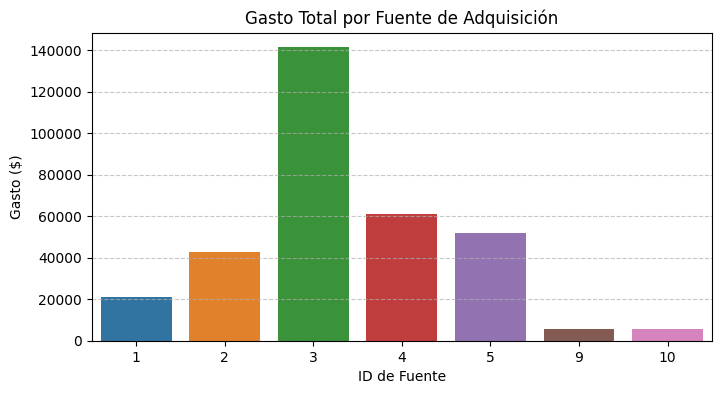

In [19]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source_sorted = costs_by_source.sort_values(by='costs', ascending=False)
print("Gasto total por fuente de adquisición:")
print(costs_by_source_sorted)

plt.figure(figsize=(8, 4))
sns.barplot(x='source_id', y='costs', data=costs_by_source_sorted)
plt.title('Gasto Total por Fuente de Adquisición')
plt.xlabel('ID de Fuente')
plt.ylabel('Gasto ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Total de gastos por fuente de adquisición:**

La fuente numero 3 es la que requirió de mayores costos de adquisición, superando por más del doble a la numero 4 y 5.

Gasto mensual a lo largo del tiempo:
   year_month     costs
0     2017-06  18015.00
1     2017-07  18240.59
2     2017-08  14790.54
3     2017-09  24368.91
4     2017-10  36322.88
5     2017-11  37907.88
6     2017-12  38315.35
7     2018-01  33518.52
8     2018-02  32723.03
9     2018-03  30415.27
10    2018-04  22289.38
11    2018-05  22224.27


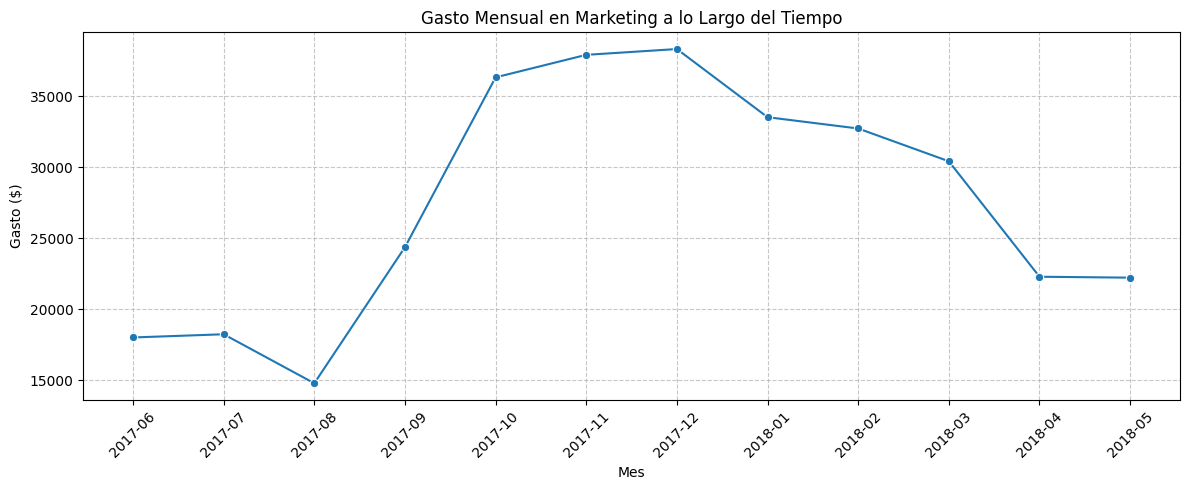

In [20]:
costs_over_time = costs.groupby('year_month')['costs'].sum().reset_index()
costs_over_time['year_month'] = costs_over_time['year_month'].astype(str)

print("Gasto mensual a lo largo del tiempo:")
print(costs_over_time)

plt.figure(figsize=(12, 5))
sns.lineplot(x='year_month', y='costs', data=costs_over_time, marker='o')
plt.title('Gasto Mensual en Marketing a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Gasto ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Total de gastos a lo largo del tiempo:**

Los gastos aumentaron más del doble de agosto 2017 a octubre 2017, luego hubo una disminución gradual hasta abril 2018 y los gastos se mantuvieron igual para el próximo mes mayo 2018.

### **2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**

In [21]:
# Primera visita de cada usuario e identificación de su fuente de adquisición
first_visits_info = visits.sort_values('Start Ts').groupby('Uid').first().reset_index()

# Contar el número de clientes únicos por cada fuente de adquisición
customers_by_source = first_visits_info.groupby('Source Id')['Uid'].nunique().reset_index()
customers_by_source.rename(columns={'Source Id': 'source_id', 'Uid': 'total_customers'}, inplace=True)


Costo de Adquisición de Clientes (CAC) por Fuente:
   source_id      costs  total_customers       cac
1          2   42806.04            17616  2.429952
0          1   20833.27             9469  2.200155
2          3  141321.63            66116  2.137480
4          5   51757.10            49237  1.051183
5          9    5517.49             6448  0.855690
3          4   61073.60            72346  0.844188
6         10    5822.49             6903  0.843472


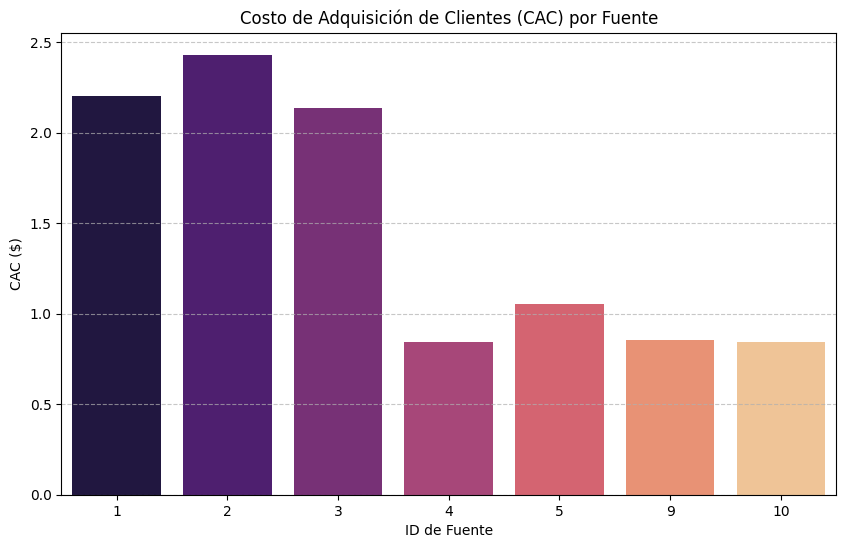

In [22]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
cac_data = pd.merge(costs_by_source, customers_by_source, on='source_id', how='left')

cac_data['cac'] = cac_data['costs'] / cac_data['total_customers']
cac_data['cac'] = cac_data['cac'].replace([np.inf, -np.inf], np.nan).fillna(0)

print("\nCosto de Adquisición de Clientes (CAC) por Fuente:")
print(cac_data.sort_values(by='cac', ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='cac', data=cac_data.sort_values(by='cac', ascending=False), palette='magma')
plt.title('Costo de Adquisición de Clientes (CAC) por Fuente')
plt.xlabel('ID de Fuente')
plt.ylabel('CAC ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Las fuentes con mayor costo de adquisición de clientes (CAC) fueron para las fuentes 1, 2 y 3.

###  **3. ¿Cuán rentables eran las inversiones? (ROMI)**

In [23]:
# Primer visita de cada usuario y su fuente
first_visits_sources = visits.sort_values('Start Ts').groupby('Uid').first().reset_index()
first_visits_sources = first_visits_sources[['Uid', 'Source Id']]

# Calcular los ingresos totales por usuario
revenue_by_user = orders.groupby('Uid')['Revenue'].sum().reset_index()

# Unir los ingresos de los usuarios con su primera fuente de adquisición
user_revenue_with_source = pd.merge(revenue_by_user, first_visits_sources, on='Uid', how='inner')

# 4. Sumar los ingresos totales por cada Source Id
revenue_by_acquisition_source = user_revenue_with_source.groupby('Source Id')['Revenue'].sum().reset_index()
revenue_by_acquisition_source.rename(columns={'Source Id': 'source_id', 'Revenue': 'total_revenue'}, inplace=True)


ROMI por Fuente de Adquisición (%):
   source_id  total_revenue      costs       romi
0          1       31090.55   20833.27  49.235094
1          2       46923.61   42806.04   9.619133
5          9        5759.40    5517.49   4.384421
4          5       52624.02   51757.10   1.674978
3          4       56696.83   61073.60  -7.166386
6         10        4450.33    5822.49 -23.566550
2          3       54511.24  141321.63 -61.427532


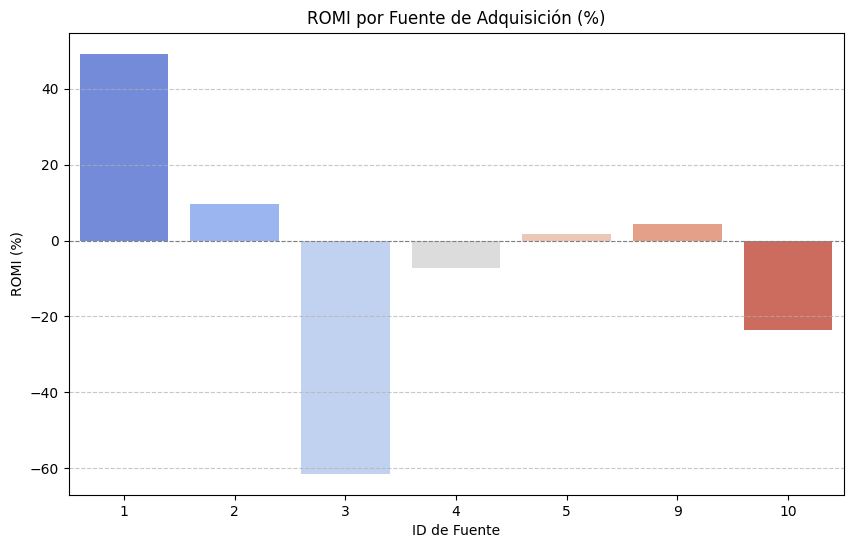

In [24]:
# Unir ingresos y costos por fuente
romi_data_by_source = pd.merge(revenue_by_acquisition_source, costs_by_source, on='source_id', how='inner')

# Calcular el ROMI por fuente
romi_data_by_source['romi'] = (romi_data_by_source['total_revenue'] - romi_data_by_source['costs']) / romi_data_by_source['costs'] * 100
romi_data_by_source['romi'] = romi_data_by_source['romi'].replace([np.inf, -np.inf], np.nan).fillna(0)

print("\nROMI por Fuente de Adquisición (%):")
print(romi_data_by_source.sort_values(by='romi', ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='romi', data=romi_data_by_source.sort_values(by='romi', ascending=False), palette='coolwarm')
plt.title('ROMI por Fuente de Adquisición (%)')
plt.xlabel('ID de Fuente')
plt.ylabel('ROMI (%)')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Línea en 0 para ver si es rentable o no
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo hasta este punto! Calculaste muy bien las métricas de negocio y las explicas correctamente con las gráficas y tus comentarios lo cual deja claro el mensaje que se quiere compartir sin importar si la audiencia a la que expongas tus resultados sea técnica o no.
</div>

#### Paso 3: Conclusión

Recomiendo seguir utilizando la fuentes 1 al ser la fuente con mejor ROMI y ser rentable. Asimismo, puede seguirse utilizando la fuente 2 porque aunque su ROMI sea bajo, sí es positivo, estudiar a fondo los costos de esta fuente podría ser clave para aumentar su ROMI. Las Fuentes 9 y 5 también tienen ROMI positivas y podrían tener potencial.

Se recomienda revisar si vale la pena seguir con la inversión que se le da a la fuente 3, dado que su costo es bastante alto en comparación con las demás y es la menos rentable al obtener el ROMI más bajo. Del mismo modo la fuente 10 y 4 también muestran ROMI's negativos que deberán revisarse para entender por qué sus ROMI's son negativas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes un muy buen análisis de este proyecto, te felicito!

Siempre este tipo de análisis que son un poco más complejos hay que buscar cómo explicarlos de manera sencilla considerando la audiencia a la cual se va a presentar los resultados y es ahí donde las visualizaciones juegan un papel muy importante ya que con una visualización es mucho más fácil entender la explicación que con solo valores numéricos.

Muy buen trabajo, saludos!
</div>